In [317]:
import pandas as pd
import yfinance as yf
import pandas_ta as ta
import mplfinance as mpf
import numpy as np

In [318]:
# Download data from Yahoo Finance
# df = yf.download("^NSEI", start="2020-01-01", end="2024-01-09")
df = yf.download("AAPL", start="2020-01-01", end="2024-01-09")

# Change column names from upper to lower case
df. columns = df.columns.str.lower()

[*********************100%%**********************]  1 of 1 completed


Moving Average Crossover:

Concept:
 
This strategy involves using two moving averages of different periods (e.g., 50-day and 200-day moving averages). When the shorter-term moving average crosses above the longer-term moving average, it generates a buy signal, indicating a potential uptrend. Conversely, when the shorter-term moving average crosses below the longer-term moving average, it generates a sell signal, indicating a potential downtrend.

Implementation: You can implement this strategy by calculating the moving averages and monitoring their crossovers. For example, if the 50-day moving average crosses above the 200-day moving average, generate a buy signal, and vice versa.

In [319]:
fma = 8
sma = 21

# Add column for fast moving average (ema_fast) and slow moving average (ema_21)
df["ema_8"] = ta.ema(df.close, length=fma)
df["ema_21"] = ta.ema(df.close, length=sma)

# Remove rows with missing values
df = df.dropna()

C:\Users\iamlo\AppData\Local\Temp\ipykernel_6980\2367192793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x["buy_signal"] = (data_x["ema_8"] > data_x["ema_21"]) & (data_x["ema_8"].shift(1) <= data_x["ema_21"].shift(1))
C:\Users\iamlo\AppData\Local\Temp\ipykernel_6980\2367192793.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x["sell_signal"] = (data_x["ema_8"] < data_x["ema_21"]) & (data_x["ema_8"].shift(1) >= data_x["ema_21"].shift(1))
C:\Users\iamlo\AppData\Local\Temp\ipykernel_6980\23

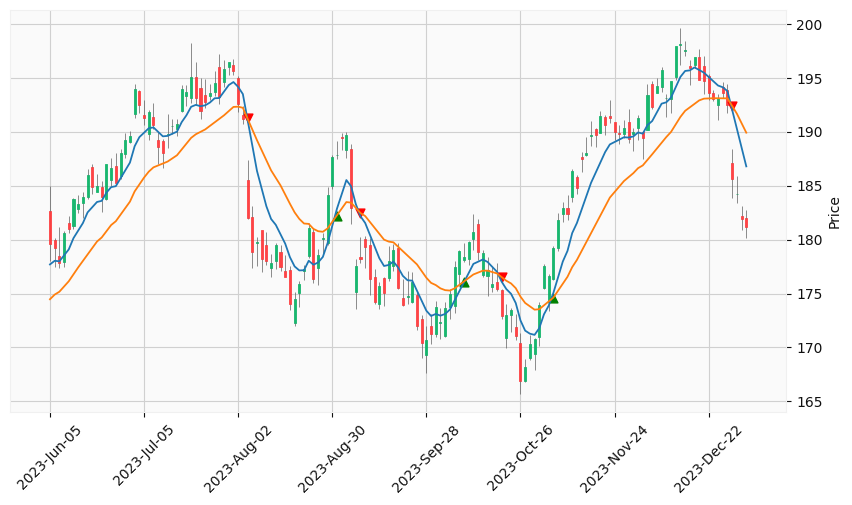

In [320]:
data_x = df[-150: -1]

data_x["buy_signal"] = (data_x["ema_8"] > data_x["ema_21"]) & (data_x["ema_8"].shift(1) <= data_x["ema_21"].shift(1))
data_x["sell_signal"] = (data_x["ema_8"] < data_x["ema_21"]) & (data_x["ema_8"].shift(1) >= data_x["ema_21"].shift(1))

data_x["sell_numeric"] = np.where(data_x["sell_signal"],data_x["ema_21"], np.nan)
data_x["buy_numeric"] = np.where(data_x["buy_signal"],data_x["ema_21"], np.nan)

adp = [
    mpf.make_addplot(data_x["ema_8"], type="line"), 
    mpf.make_addplot(data_x["ema_21"], type="line"),
    mpf.make_addplot(data_x["buy_numeric"], type="scatter", marker="^", markersize=40, color="green"),
    mpf.make_addplot(data_x["sell_numeric"], type="scatter", marker="v", markersize=40, color="red")
    ]
mpf.plot(data_x, type="candle", figratio=(15,8), addplot=adp, style="yahoo")

In [321]:
# These are the dates and prices on which to buy
data_x.loc[data_x["buy_signal"], "ema_21"]

Date
2023-08-31    182.203408
2023-10-10    176.030909
2023-11-06    174.619467
Name: ema_21, dtype: float64

In [322]:
# These are the dates and prices on which to sell
data_x.loc[data_x["sell_signal"], "ema_21"]

Date
2023-08-04    191.298684
2023-09-08    182.469582
2023-10-20    176.501417
2024-01-02    192.427832
Name: ema_21, dtype: float64

Relative Strength Index (RSI):

Concept: 
RSI measures the magnitude of recent price changes to evaluate overbought or oversold conditions in a stock. Traditionally, RSI values above 70 indicate overbought conditions, suggesting a potential reversal to the downside, while RSI values below 30 indicate oversold conditions, suggesting a potential reversal to the upside.

Implementation: Calculate the RSI for a given period (typically 14 days) and use threshold values (e.g., 70 and 30) to generate buy or sell signals based on overbought or oversold conditions, respectively.